In [1]:
#Import Dependencies
import cv2
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection (image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#Color Conversion (BGR to RGB)
    image.flags.writeable = False                 #Image is no longer writeable
    results = model.process(image)                #Make prediction
    image.flags.writeable = True                  #Image is writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)#Color Conversion (RBG to BGR)
    return image, results 

In [4]:
def draw_landmarks(image, results):
     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)       #Draw Pose Connection
     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  #Draw Hand Connection
     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Draw Hand Connection

In [5]:
def draw_styled_landmarks(image, results):
    #Draw Pose Connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=2, circle_radius=2)
                             )
    #Draw Left Hand Connection
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=2, circle_radius=2)
                             )  
    #Draw Right Hand Connection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=2, circle_radius=2)
                             ) 

In [6]:
#Keypoint Extraction
cap = cv2.VideoCapture(0)

#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        #Read Feed
        ret, frame = cap.read()
    
        #Make detection 
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #Draw Landmarks
        draw_styled_landmarks(image, results)
        
        #Show to screen
        cv2.imshow('OpenCV Feed', image)
        
        #Breaking Gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.pose_landmarks.landmark)

33

In [8]:
draw_landmarks(frame, results)

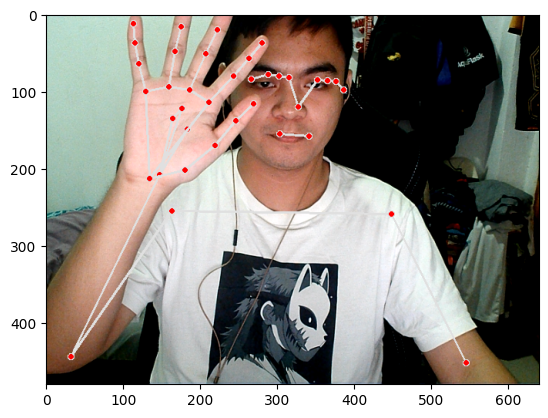

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
len(results.pose_landmarks.landmark)*4

132

In [11]:
#Extracting Keypoint values
pose = []
for res in results.pose_landmarks.landmark:
    test=np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [13]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
def extract_keypoints (results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, rh, lh])

In [16]:
result_test = extract_keypoints(results)
result_test.shape

(258,)

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 5.11598468e-01,  2.50933260e-01, -9.31401730e-01,  9.99955475e-01,
        5.50694406e-01,  1.78839505e-01, -8.71657729e-01,  9.99875546e-01,
        5.70493937e-01,  1.80478483e-01, -8.71264160e-01,  9.99828458e-01,
        5.88496983e-01,  1.82460710e-01, -8.71330261e-01,  9.99823809e-01,
        4.93686259e-01,  1.71191797e-01, -8.81795406e-01,  9.99912441e-01,
        4.72583950e-01,  1.67357519e-01, -8.81525695e-01,  9.99912322e-01,
        4.50611919e-01,  1.63675830e-01, -8.81670356e-01,  9.99931574e-01,
        6.04194939e-01,  2.04627350e-01, -4.33945239e-01,  9.99780595e-01,
        4.15946007e-01,  1.76148161e-01, -4.57641125e-01,  9.99939263e-01,
        5.33506930e-01,  3.29470813e-01, -7.64802277e-01,  9.99935389e-01,
        4.73786354e-01,  3.23909551e-01, -7.76075721e-01,  9.99965310e-01,
        7.00972974e-01,  5.39796889e-01, -1.36170134e-01,  9.99640644e-01,
        2.55196363e-01,  5.32414794e-01, -2.93745607e-01,  9.99903142e-01,
        8.53053868e-01,  

In [33]:
#Setup Dataset Folder

#Path for exported data
DATA_PATH = os.path.join('MP_Data')

#Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

#Thirty videos worth of data
no_sequence = 30

#Videos are going to be 30 frames in length
sequence_length = 30

In [25]:
#hello
#thanks 
#iloveyou

In [26]:
 for action in actions:
         for sequence in range(no_sequence):
             try:
                os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
             except:
                 pass

In [22]:
#Data Collection
cap = cv2.VideoCapture(0)

#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    #NEW LOOP
    #Loop through actions
    for action in actions:
        #Loop through sequences aka videos
        for sequence in range(no_sequence):
            #Loop through video length aka sequence length
            for frame_num in range(sequence_length):
        
                #Read Feed
                ret, frame = cap.read()
            
                #Make detection 
                image, results = mediapipe_detection(frame, holistic)
                print(results)
        
                #Draw Landmarks
                draw_styled_landmarks(image, results)

                #NEW Apply wait logic
                if frame_num == 0:
                    cv2.putText(image,'STARTING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)

                    #Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                #Breaking Gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'actions' is not defined

In [27]:
cap.release()
cv2.destroyAllWindows()

In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [29]:
label_map = {label:num for num, label in enumerate(actions)}

In [30]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [36]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequence):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [37]:
np.array(sequences).shape

(90, 30, 258)

In [38]:
np.array(labels).shape

(90,)

In [39]:
#PREPROCESSING

In [41]:
 X= np.array(sequences)

In [42]:
X.shape

(90, 30, 258)

In [43]:
y = to_categorical(labels).astype(int)

In [44]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [50]:
y_test.shape

(5, 3)

In [57]:
#IMPORT ESSENTIAL DEPENDENCIES
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import TensorBoard

In [58]:
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [64]:
model = Sequential()
model.add(Input(shape=(30, 258)))  
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [65]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [66]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - categorical_accuracy: 0.3176 - loss: 1.1077
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 0.3176 - loss: 1.0688
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.4353 - loss: 0.9988
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.7647 - loss: 0.9834
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 0.6471 - loss: 0.8217
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 0.7294 - loss: 0.8034
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 0.6824 - loss: 0.6873
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.7529 - loss: 0.5554
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 0.8000 - loss: 0.4226
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 0.7882 - loss: 0.5051
Epoch 11/2000
3/3 ━━━━━━━━━━━

In [67]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 30, 64)              │          82,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 711,755 (2.72 MB)

 Trainable params: 237,251 (926.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 474,504 (1.81 MB)

In [68]:
# MAKE PREDICTIONS
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


In [69]:
res

array([[1.6657773e-37, 9.9999940e-01, 5.4797312e-07],
       [1.3238604e-36, 9.9999917e-01, 8.1958387e-07],
       [2.7440882e-16, 9.9024057e-01, 9.7594913e-03],
       [9.5322049e-01, 4.6139657e-02, 6.3981820e-04],
       [9.7101684e-26, 9.9972636e-01, 2.7360086e-04]], dtype=float32)

In [70]:
actions[np.argmax(res[0])]

'thanks'

In [71]:
actions[np.argmax(y_test[0])]

'thanks'

In [74]:
model.save("my_model.keras")

In [75]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [82]:
yhat = model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 


In [83]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [84]:
ytrue

[2,
 2,
 0,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 1]

In [85]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[55,  1],
        [ 0, 29]],

       [[59,  0],
        [ 1, 25]],

       [[55,  0],
        [ 0, 30]]], dtype=int64)

In [86]:
accuracy_score(ytrue, yhat)

0.9882352941176471